
# Sect 13 & 14(Pt 1) - Central Limit Theorem & Hypothesis Testing 

- online-ds-pt-041320
- 06/26/20



# Questions

# Topics / Learning Objectives

- Briefly Review: Normal distribution / Z-tests 
- Discuss Central Limit Theorem & Sampling
- The T-Distribution (and degrees of Freedom)
- Intro to AB Testing / Big-Picture Hypothesis Testing Workflow

- [Questions Gdoc](https://docs.google.com/document/d/196yIMNSRSRspBdBmjHq7vMhFF-YdpvkyYEHYV5nm8xg/edit#heading=h.g9vz0dbfo2io)

# Resources

- **My Complete Outline / Resource Repo for Hypothesis Testing**
    - URL: https://github.com/jirvingphd/hypothesis_testing_workflow_python
    - Includes:
        - [Hypothesis Testing Slide Show (Code Academy)](https://github.com/jirvingphd/hypothesis_testing_workflow_python/blob/master/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf)
        - [Notebook with Full Hypothesis Testing Outline](https://nbviewer.jupyter.org/github/jirvingphd/hypothesis_testing_workflow_python/blob/master/hypothesis_testing_workflow.ipynb)
    
    
- [Hypothesis Testing Cheat Sheet](https://drive.google.com/file/d/17ePxNQdfM3OdrKEr_v0rVmivv9mNI_6I/view?usp=sharing)


# Sect 13: Central Limit Theorem

> "The central limit theorem states that, under many conditions, independent random variables summed together will converge to a normal distribution as the number of variables increases."
- This becomes very useful for applying statistical logic to sample statistics in order to estimate population parameters.
- The means of samples from the population will form a normal distribution, ***no matter what how a population's distribution is shaped!***


## Review: Normal Distribution

> **The Normal Distribution is symmetrical and its mean, median and mode are equal.** 
* area under curve is equal to 1.0
* denser in the center and less dense in the tails
* defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).

> **The Standardized Normal Distribution** is a special case of the Normal Distribution where the mean is 0 and the std is 1.
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


In [1]:
!pip install -U fsds
from fsds.imports import *

fsds v0.2.15 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c1ce64ef0>)

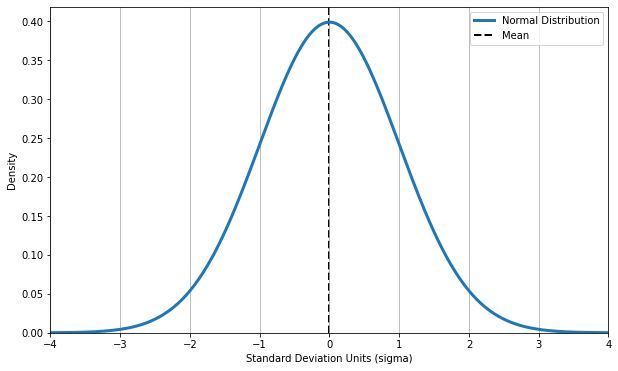

In [3]:
plot_normal()

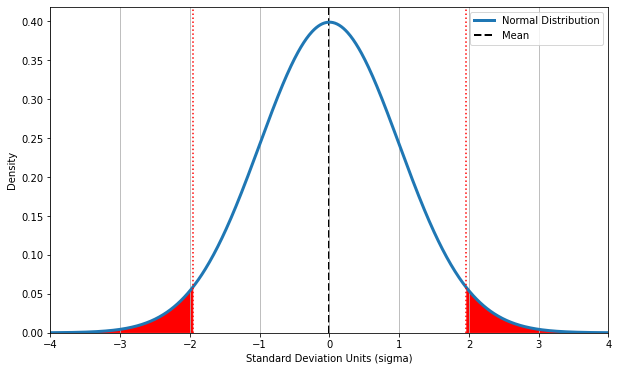

In [4]:
## Get normal dist figure
fig,ax =plot_normal(x,y)

## Critical Values (from z-table lookup)
crit_z_hi = 1.96
crit_z_low= -crit_z_hi

## Plot critical values 
crit_kws = dict(c='red',ls=':')
ax.axvline(crit_z_hi,**crit_kws)
ax.axvline(crit_z_low,**crit_kws)

# Fill tails
ax.fill_between(x,y,where=(x>crit_z_hi)|(x<crit_z_low),color='red')#&(y)

In [5]:
# !pip install -U fsds
from fsds.imports import *

## Northwind Discount Question - Revisited

In [6]:
import sqlite3
db  = '../../datasets/Northwind_small.sqlite'
connect = sqlite3.connect(db)
cur = connect.cursor()

In [7]:
## To see all tables
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")

df = pd.DataFrame(cur.execute("""SELECT * from OrderDetail""").fetchall(),
                  columns=[col[0] for col in cur.description])
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [8]:
df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

## Sampling From a Population

### Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=30%>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.




<!---For $z$-tests, a $z$-statistic is used as our test statistic. You'll see other test statistics suitable for other tests later. A one-sample $z$-statistic is calculated as:

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square root of $n$ to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". --->


### Demonstrating How Taking Many Samples Creates a Normal Distribution of Means (like in CLT Lab)

In [9]:
## CLT Lab
def get_sample(data, n):
    return data.sample(n,replace=True).values

def get_sample_mean(sample):
    return sample.mean()

def create_sample_distribution(data, dist_size=100, n=30):
    sample_means = []
    for i in range(dist_size):
        sample = get_sample(data,n)
        sample_means.append( get_sample_mean(sample))
    return sample_means

In [10]:
import scipy.stats as stats
def test_for_normality(x,label=None,get_p=False):
    ## Run Normal test 
    result = stats.normaltest(x)
    
    ## Display results
    if label is not None:
        print(f"Results for {label}:")
    print(' -',result)
    
    ## Seperate out p value
    stat_value = result[0]
    p = result[1]

    ## Add explicit conclusion/interpretation
    if p < .05:
        print(" - The sample is NOT normal (p<.05)")
    else:
        print(" - The sample IS normal.(p>.05)")
                       
                       
    if get_p:
        return p

test_for_normality(df['Quantity'],label='All')

Results for All:
 - NormaltestResult(statistic=788.7675748712809, pvalue=5.263775575788698e-172)
 - The sample is NOT normal (p<.05)


In [11]:
def interpret_normaltest(p):
    if p < .05:
        label_suffix = f" (Not Normal: p={round(p,4)})"
    else:
        label_suffix = f" (Normal: p={round(p,4)})"
    return label_suffix

Results for Original Data:
 - NormaltestResult(statistic=788.7675748712809, pvalue=5.263775575788698e-172)
 - The sample is NOT normal (p<.05)
Results for Sample Means:
 - NormaltestResult(statistic=8.313996552285445, pvalue=0.015654477884102496)
 - The sample is NOT normal (p<.05)


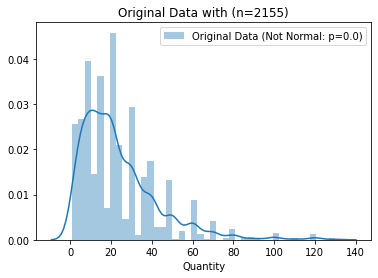

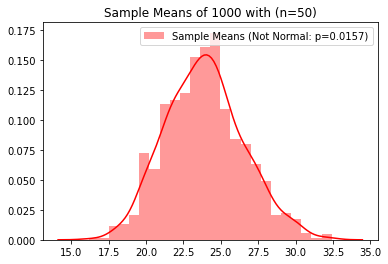

In [12]:
## Set data, sample size, number of samples
data = df["Quantity"].copy()
n = 50
N_SAMPLES = 1000

## Plot Orig Data & Test Normality
label1 = 'Original Data'
p1 = test_for_normality(data,label=label1,get_p=True)
    
ax = sns.distplot(data,label=label1+interpret_normaltest(p1))
ax.set_title(f"Original Data with (n={len(data)})")

ax.legend()

### RESAMPLE AND PLOT MEANS
## Empty lists for samples and means
samples = [] 
sample_means = []

## Get Samples & Means
for i in range(N_SAMPLES):
    sample = data.sample(n)
    samples.append(sample)
    sample_means.append(sample.mean())


## Plot sample means
plt.figure()
label2='Sample Means'
p2 = test_for_normality(sample_means,label=label2,get_p=True)
ax = sns.distplot(sample_means,color='red',label=label2+interpret_normaltest(p2))
ax.set_title(f"Sample Means of {N_SAMPLES} with (n={n})")
ax.legend()

# Section 14: Hypothesis Testing

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-onl01-dtsc-ft-030220/master/images/new_the-scientific-method.png">

## Foundations of a Sound Experiment

- **Control Group/Random Controlled Trials**

- **If humans are administering the experiment and/or grading/recording observations** about the groups, we should ideally use a **double blind** design (though single blind is better than nothing).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-online-ds-pt-100719/master/images/new_double_blind.png" width=60%>

- **Sampling Techniques:**
    - Sampling is independent
    - Sample is collected randomly
    - Sample is approximately normally distributed
    - Appropriate sample size
    
- **Reproducibility**

## P-Values & Null Hypotheses

**_Null Hypothesis_**: There is no relationship between A and B   
Example: "There is no relationship between this flu medication and a reduced recovery time from the flu".

The _Null Hypothesis_ is usually denoted as $H_{0}$

**_Alternative Hypothesis_**: The hypothesis traditionally thought of when creating a hypothesis for an experiment  
Example: "This flu medication reduces recovery time for the flu."

The _Alternative Hypothesis_ is usually denoted as $H_{1}$


> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

$\alpha$ **_(alpha)_**: The marginal threshold at which you're okay with rejecting the null hypothesis. 
> If you set an alpha value of $\alpha = 0.05$, you're essentially saying "I'm okay with accepting my alternative hypothesis as true if there is less than a 5% chance that the results that I'm seeing are actually due to randomness."

**_p-value_**: The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If you calculate a p-value and it comes out to 0.03, you can interpret this as saying "There is a 3% chance of obtaining the results I'm seeing when the null hypothesis is true."  




In simple terms:

$p < \alpha$: Reject the _Null Hypothesis_ and accept the _Alternative Hypothesis_

$p >= \alpha$: Fail to reject the _Null Hypothesis_.  


> **_Example One-Tail Hypothesis_**

$H_{1} : \mu_1 < \mu_2 $ The treatment group given this weight loss drug will lose more weight on average than the control group that was given a competitor's weight loss drug 

$ H_{0} : \mu1 >= \mu_2$  The treatment group given this weight loss drug will not lose more weight on average than the control group that was given a competitor's weight loss drug". 

> A **_Two-Tail Test_** is for when you want to test if a parameter falls between (or outside of) a range of two given values. 

**_Example Two-Tail Hypothesis_**

$H_{1} : \mu_1 \neq \mu_2$ "People in the experimental group that are administered this drug will not lose the same amount of weight as the people in the control group.  They will be heavier or lighter". 

$H_{0} : \mu_1 = \mu_2$ "People in the experimental group that are administered this drug will lose the same amount of weight as the people in the control group." 




***When in doubt, do a 2-tailed test***

## The T-Distribution & T-Tests

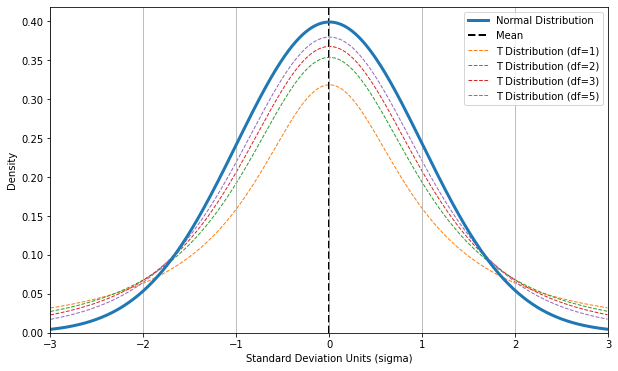

In [17]:
## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [1,2,3,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


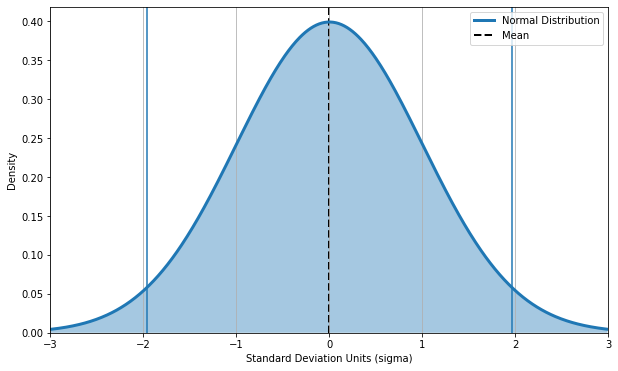

In [19]:
## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


# Hypothesis Testing Overview (not in notebook)

- Review Code Academy Slideshow pdf
- Review Hypothesis Testing Workflow README

## Hypothesis Testing Applied: Northwind's Discounts 

### Hypothesis 1

> Do discounted items sell sell in greater/lesser quantities than full price products?

- $H_0$:
- $H_A$: